<a href="https://colab.research.google.com/github/jazaineam1/Andes_ADDBD/blob/main/Sesion12/Clase_12_Introducci%C3%B3n_al_ML_Modelo_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Análisis de Datos y Big data***

## ***Universidad de los Andes***
>## **Dirección de Educación Continua.**
>>## **Formación de habilidades escenciales.**

![Imágen1](https://github.com/jazaineam1/Andes_ADDBD/blob/main/Imagenes/Presentaci%C3%B3n-removebg-preview.png?raw=true)

**Ver la presentación  [acá](https://github.com/jazaineam1/Andes_ADDBD/raw/main/Sesion12/Clase_12_Introducción_al_ML_Modelo_Lineal.pdf)**

# Regresión lineal en problemas de clasificación binaria

In [ ]:
# Importamos librerías de manejo numérico y procesamiento de datos.
import numpy as np
import pandas as pd
import seaborn as sns

# Importamos scikit-learn, nuestra librería base para utilizar algoritmos de machine learning.
import sklearn

#Importamos los datasets de scikit-learn
from sklearn import datasets

# Importamos librerías de scikit-learn para manejo de regresión lineal/logística.
from sklearn import linear_model

# Importamos librerías para manejo del rendimiento (performance) de nuestros modelos.
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Importamos librerías para graficar.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definimos el tamaño del graficado (opcional).
plt.rcParams['font.size']=15

In [ ]:
# Carga del Iris dataset.
iris = datasets.load_iris()

# Imprimimos los datos.
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

## 1: Familiarizarse con tu conjunto de datos

Inspeccionando los elementos parece que los "datos" contienen la información que necesitamos. Están en la forma de array, típicamente denotado $N \times M$ donde $N$ representa el número de filas (150), y $M$ el número de columnas (4).

La clave `feature_names` indica la información de las características: largo del sépalo, ancho del sépalo, largo del pétalo y ancho del pétalo.

El término "target", salida u objetivo es típicamente la meta que queremos modelar. La clave `target_names` indica 3 especies de esta flor: "setosa", "versicolor" y "virginica".

Nuestra meta es usar estos features y descripciones de las flores para poder predecir la especie de la planta.

Para comenzar llevemos estos datos a un DataFrame en Pandas:

In [ ]:
# Creamos el DataFrame con los nombres de las características.
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Creamos el DataFrame con los targets (las especies de la flor).
target = pd.DataFrame(data=iris.target, columns=['species'])

In [ ]:
# Unimos ambos DF con concat; agregamos una nueva columna.
data = pd.concat([data, target], axis=1)

# Mezclar en orden aleatorio.
data = data.sample(frac=1, random_state=1234)

# Imprimimos los primeros registros del nuevo DataFrame.
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
91,6.1,3.0,4.6,1.4,1
63,6.1,2.9,4.7,1.4,1
103,6.3,2.9,5.6,1.8,2
6,4.6,3.4,1.4,0.3,0
59,5.2,2.7,3.9,1.4,1


### Creamos una variable de respuesta binaria

Cuando la observación es de Especie 1, tomara el valor 1, y 0 en cualquier otro caso.

In [ ]:
### Crear la variable de respuesta
data['EsEspecie1'] = data['species']==1
data.loc[data['EsEspecie1']==True, 'EsEspecie1'] = 1
data.loc[data['EsEspecie1']==False, 'EsEspecie1'] = 0
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,EsEspecie1
91,6.1,3.0,4.6,1.4,1,1
63,6.1,2.9,4.7,1.4,1,1
103,6.3,2.9,5.6,1.8,2,0
6,4.6,3.4,1.4,0.3,0,0
59,5.2,2.7,3.9,1.4,1,1


#Ejecutar regresión univariada

In [ ]:
Y = data['EsEspecie1']
x = data['petal length (cm)'].values # se utiliza values para pasar a formato array, y podr usar en regresión univariada

In [ ]:
model_univar = linear_model.LinearRegression()
model_univar.fit(x.reshape(-1, 1), Y) # Para regresión univariada de X hay que usar el .reshape(-1, 1)
prediction_univar= model_univar.predict(x.reshape(-1, 1))
prediction_univar

array([0.37884926, 0.38425495, 0.43290618, 0.20586712, 0.34100942,
       0.2166785 , 0.21127281, 0.19505574, 0.3518208 , 0.49236879,
       0.34100942, 0.20046143, 0.49236879, 0.35722649, 0.2166785 ,
       0.31938665, 0.45452894, 0.2166785 , 0.44371756, 0.35722649,
       0.36263218, 0.37884926, 0.37344357, 0.38425495, 0.45993463,
       0.21127281, 0.39506633, 0.34641511, 0.44912325, 0.2166785 ,
       0.29235819, 0.38966064, 0.20046143, 0.40587772, 0.40047203,
       0.23289558, 0.20586712, 0.2220842 , 0.18424435, 0.30857526,
       0.20046143, 0.37344357, 0.21127281, 0.40587772, 0.45452894,
       0.21127281, 0.40587772, 0.41128341, 0.45993463, 0.43290618,
       0.20586712, 0.41128341, 0.48696309, 0.36263218, 0.30857526,
       0.32479234, 0.37344357, 0.39506633, 0.37884926, 0.20586712,
       0.21127281, 0.45993463, 0.40047203, 0.40587772, 0.21127281,
       0.20586712, 0.20586712, 0.40047203, 0.34641511, 0.43290618,
       0.43831187, 0.37344357, 0.20586712, 0.4166891 , 0.21127

Text(0.5, 1.0, 'Valor predicho vs valor observado')

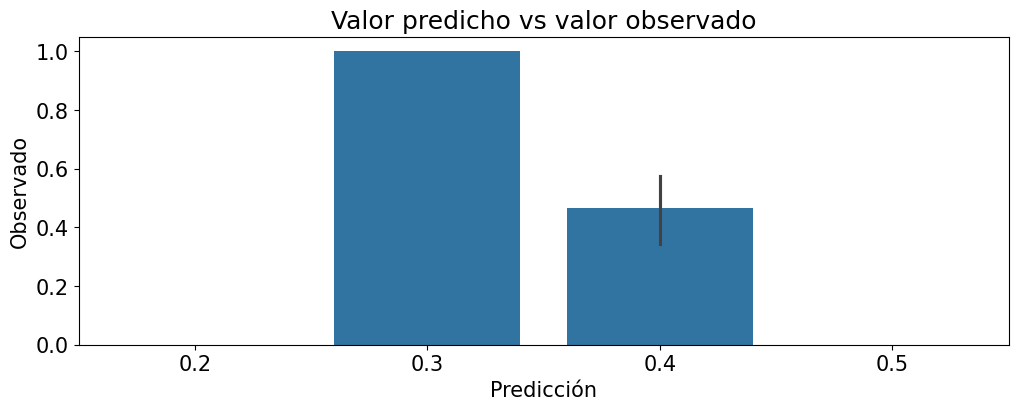

In [ ]:
plt.figure(figsize=(12, 4))
sns.barplot(x=prediction_univar.round(1), y=Y)

# Agregar etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Observado')
plt.title('Valor predicho vs valor observado')



###Ejecutar regresión multivariada

In [ ]:
import numpy as np

# Creamos dataframe Y y x
Y = data['EsEspecie1']
x = data[['petal length (cm)','petal width (cm)','sepal length (cm)','sepal width (cm)']]

model_multi = linear_model.LinearRegression()
model_multi.fit(x, Y) # Para regresión univariada de X hay que usar el .reshape(-1, 1)
prediction_multi = model_multi.predict(x)
prediction_multi # Vemos algunos negativos!!!!!

array([ 0.44032183,  0.50695038,  0.50379929,  0.12990166,  0.43767658,
        0.31057404,  0.1447454 ,  0.21626025,  0.47660262,  0.66402056,
        0.52444569,  0.25041938,  0.11954299,  0.30665423, -0.02687958,
        0.58161632,  0.06780585,  0.39365119,  0.71811816,  0.54524653,
        0.46206725,  0.47195295,  0.2736549 ,  0.65037332, -0.06195042,
        0.05360678,  0.4384541 ,  0.59107424,  0.3610235 ,  0.21943542,
        0.4785049 ,  0.37384092,  0.05521164,  0.58631829,  0.36820533,
        0.28563618,  0.40617118,  0.22941013,  0.00194138,  0.68527494,
        0.09456545,  0.72330189, -0.0731937 ,  0.04509593,  0.44024378,
        0.37846867,  0.1515192 ,  0.11575521,  0.29420381,  0.11003061,
        0.35153271,  0.26807793,  0.5054151 ,  0.46609799,  0.64272868,
        0.32372176,  0.3789011 ,  0.39640736,  0.52423728,  0.07526319,
        0.19132239,  0.5870958 ,  0.46287516,  0.15688775, -0.0412238 ,
       -0.19529901,  0.12469385,  0.50021361,  0.86415132,  0.83

Text(0.5, 1.0, 'Valor predicho vs valor observado')

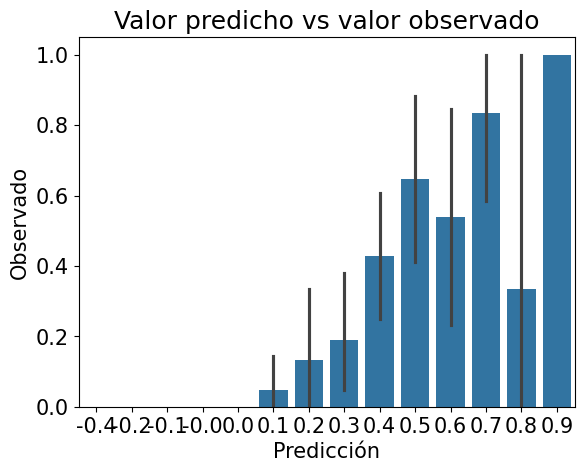

In [ ]:
sns.barplot(x=prediction_multi.round(1), y=Y)

# Agregar etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Observado')
plt.title('Valor predicho vs valor observado')
